## Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd ..

/mnt/d/anomaly-detection


In [3]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


In [4]:
window_length = 64

X = np.array([
    data.iloc[i - window_length:i].to_numpy().flatten()
    for i in range(window_length, data.shape[0] - window_length)
]).reshape(-1, window_length, data.shape[1])

## Train model

In [5]:
from src.models.autoencoder import build_autoencoder
import keras

create_params = dict(
    input_shape=window_length,
    hidden_layers_size=[32],
    reg_strength=0.01,
    input_dropout=0.1,
)

compile_params = dict(
    optimizer=keras.optimizers.Adam(lr=0.01),
)

fit_params = dict(
    batch_size=64,
    epochs=100,
    verbose=1,
    callbacks=[keras.callbacks.ReduceLROnPlateau(patience=5),
               keras.callbacks.EarlyStopping(min_delta=0.01, patience=10)]
)

model_fn = lambda: build_autoencoder(create_params, compile_params)

Using TensorFlow backend.


In [6]:
from sklearn.model_selection import TimeSeriesSplit

tssplit = TimeSeriesSplit(n_splits=3)
results = []

for i, (train_idx, test_idx) in enumerate(tssplit.split(X, X)):
    print(f'Fold {i}...')
    model = model_fn()
    
    history = model.fit(X[train_idx, :, 0],
                        X[train_idx, :, 0],
                        validation_data=(X[test_idx, :, 0], X[test_idx, :, 0]),
                        **fit_params)
    results.append(history.history)

W0911 19:04:33.130519 140266295461696 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 19:04:33.135576 140266295461696 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0911 19:04:33.159896 140266295461696 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 19:04:33.164149 140266295461696 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholde

Fold 0...


W0911 19:04:33.438761 140266295461696 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3169 samples, validate on 3168 samples
Epoch 1/100
3169/3169 [==============================] - 0s 131us/step - loss: 0.5237 - val_loss: 0.2856
Epoch 2/100
3169/3169 [==============================] - 0s 29us/step - loss: 0.2259 - val_loss: 0.2072
Epoch 3/100
3169/3169 [==============================] - 0s 29us/step - loss: 0.2078 - val_loss: 0.2273
Epoch 4/100
3169/3169 [==============================] - 0s 30us/step - loss: 0.2052 - val_loss: 0.2487
Epoch 5/100
3169/3169 [==============================] - 0s 32us/step - loss: 0.2130 - val_loss: 0.2266
Epoch 6/100
3169/3169 [==============================] - 0s 33us/step - loss: 0.2164 - val_loss: 0.2126
Epoch 7/100
3169/3169 [==============================] - 0s 30us/step - loss: 0.2060 - val_loss: 0.2444
Epoch 8/100
3169/3169 [==============================] - 0s 29us/step - loss: 0.2010 - val_loss: 0.2078
Epoch 9/100
3169/3169 [==============================] - 0s 28us/step - loss: 0.1977 - val_loss: 0.2039
Epoch 10/100
31

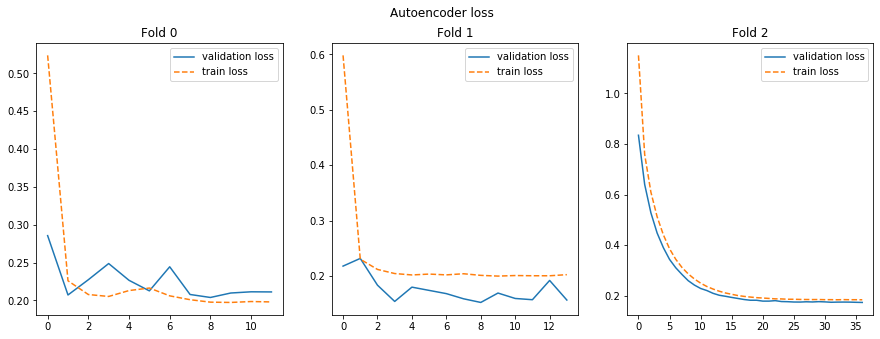

In [7]:
from src.visualization.visualize import visualize_result
visualize_result(results, f'Autoencoder loss')

It works, so lets train on all data.

In [8]:
model = model_fn()
model.fit(X[:, :, 0], X[:, :, 0], **fit_params)

Epoch 1/100
12673/12673 [==============================] - 1s 64us/step - loss: 1.0735
Epoch 2/100
 5312/12673 [===========>..................] - ETA: 0s - loss: 0.7312

/home/elch10/miniconda3/lib/python3.6/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/elch10/miniconda3/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


12673/12673 [==============================] - 0s 28us/step - loss: 0.6746
Epoch 3/100
12673/12673 [==============================] - 0s 26us/step - loss: 0.5219
Epoch 4/100
12673/12673 [==============================] - 0s 25us/step - loss: 0.4259
Epoch 5/100
12673/12673 [==============================] - 0s 22us/step - loss: 0.3604
Epoch 6/100
12673/12673 [==============================] - 0s 22us/step - loss: 0.3137
Epoch 7/100
12673/12673 [==============================] - 0s 22us/step - loss: 0.2805
Epoch 8/100
12673/12673 [==============================] - 0s 20us/step - loss: 0.2557
Epoch 9/100
12673/12673 [==============================] - 0s 20us/step - loss: 0.2371
Epoch 10/100
12673/12673 [==============================] - 0s 19us/step - loss: 0.2233
Epoch 11/100
12673/12673 [==============================] - 0s 19us/step - loss: 0.2132
Epoch 12/100
12673/12673 [==============================] - 0s 19us/step - loss: 0.2059
Epoch 13/100
12673/12673 [==========================

12673/12673 [==============================] - 0s 17us/step - loss: 0.1832
Epoch 96/100
12673/12673 [==============================] - 0s 17us/step - loss: 0.1830
Epoch 97/100
12673/12673 [==============================] - 0s 17us/step - loss: 0.1833
Epoch 98/100
12673/12673 [==============================] - 0s 17us/step - loss: 0.1829
Epoch 99/100
12673/12673 [==============================] - 0s 17us/step - loss: 0.1831
Epoch 100/100
12673/12673 [==============================] - 0s 17us/step - loss: 0.1830


In [9]:
model.save('models/onedimensional_autoencoder.h5')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
Total params: 4,192
Trainable params: 4,192
Non-trainable params: 0
_________________________________________________________________


## Extract first layer that can embedes data

In [10]:
import keras
from keras.layers import Input
from keras.models import Model, load_model

In [11]:
model = load_model('models/onedimensional_autoencoder.h5')

In [12]:
inp = Input(shape=(window_length,))
encoder_layer = model.layers[0]
encoded = encoder_layer(inp)

encoder = Model(inputs=inp, outputs=encoded)

In [13]:
encoded_X = encoder.predict(X[:, :, 0])

## Plotting

In [22]:
from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE as TSNE

def plot(embeddings, cluster_predictions):
    vis_x = embeddings[:, 0]
    vis_y = embeddings[:, 1]
    plt.scatter(vis_x, vis_y, c=cluster_predictions, marker='.')
    print(f'Counts of every value: {np.bincount(cluster_predictions)}')

def pca_plot(cluster_predictions):
    if not hasattr(pca_plot, 'X_embedded'):
        pca_plot.pca = PCA(n_components=2)
        pca_plot.X_embedded = pca_plot.pca.fit_transform(encoded_X)
    
    plt.title(f'Explained ration is {sum(pca_plot.pca.explained_variance_ratio_)}')
    plot(pca_plot.X_embedded, cluster_predictions)

def TSNE_plot(cluster_predictions):
    if not hasattr(pca_plot, 'embeddings'):
        TSNE_plot.tsne = TSNE(n_jobs=-1)
        TSNE_plot.embeddings = TSNE_plot.tsne.fit_transform(encoded_X)
        
    plt.title(f'KL divergence {TSNE_plot.tsne}')
    plot(TSNE_plot.embeddings, cluster_predictions)

## Clustering

### KMeans

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
pred = kmeans.fit_predict(encoded_X)

Counts of every value: [7129 5544]


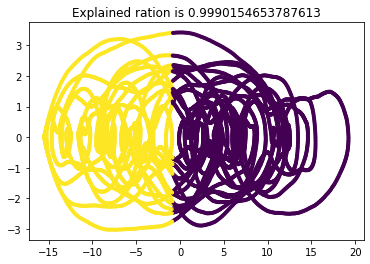

In [24]:
pca_plot(pred)

Counts of every value: [7129 5544]


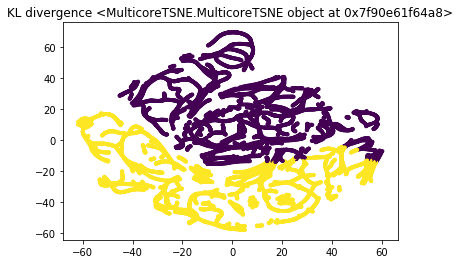

In [25]:
TSNE_plot(pred)

### Agglomerative clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2)
ac_pred = ac.fit_predict(encoded_X)

Counts of every value: [8755 3918]


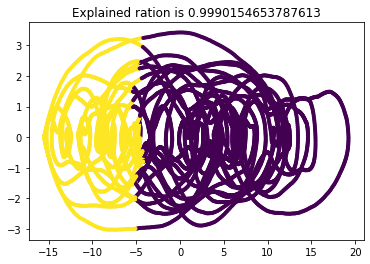

In [27]:
pca_plot(ac_pred)

Counts of every value: [8755 3918]


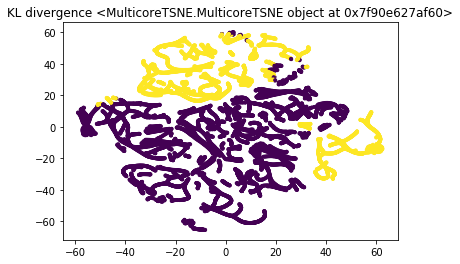

In [28]:
TSNE_plot(ac_pred)